In [1]:
from keras import backend as k

In [2]:
k.clear_session()

In [3]:
import tensorflow as tf
import os, shutil
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, BatchNormalization, Lambda
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
original_dataset_dir = '/content/drive/MyDrive/radiografia'
train_dir = "/content/drive/MyDrive/radiografia/chest_x_ray/train"
validation_images = '/content/drive/MyDrive/radiografia/chest_x_ray/validation'
test_dir = '/content/drive/MyDrive/radiografia/chest_x_ray/test'
test_dir_1 = '/content/drive/MyDrive/radiografia/chest_x_ray/test_1'

In [ ]:
test_dir = '/content/drive/MyDrive/radiografia/chest_x_ray/test'
os.mkdir(test_dir)

In [ ]:
os.makedirs('/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL', exist_ok=True) 
os.makedirs('/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA', exist_ok=True) 

In [ ]:
test_normal = '/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL'
test_pneumonia = '/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA'

In [ ]:
t_normal = "/content/drive/MyDrive/radiografia/chest_x_ray/train/NORMAL"
t_pneumonia = "/content/drive/MyDrive/radiografia/chest_x_ray/train/PNEUMONIA"

In [ ]:
filenames = os.listdir(t_normal)
for filename  in filenames[:10]:
  src = os.path.join(t_normal, filename)
  dst = os.path.join(test_normal, filename)
  shutil.move(src, dst)

filenames = os.listdir(t_pneumonia)
for filename  in filenames[:10]:
  src = os.path.join(t_pneumonia, filename)
  dst = os.path.join(test_pneumonia, filename)
  shutil.move(src, dst)

In [ ]:
print('total t_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/train/NORMAL")))
print('total t_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/train/PNEUMONIA")))
print('total v_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/validation/NORMAL")))
print('total v_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/validation/PNEUMONIA")))
print('total test_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL")))
print('total test_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA")))
print('total test_normal_predict images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test_1/NORMAL")))
print('total test_pneumonia_predict images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test_1/PNEUMONIA")))

total t_normal images: 1339
total t_pneumonia images: 3873
total v_normal images: 234
total v_pneumonia images: 390
total test_normal images: 234
total test_pneumonia images: 390
total test_normal_predict images: 10
total test_pneumonia_predict images: 10


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

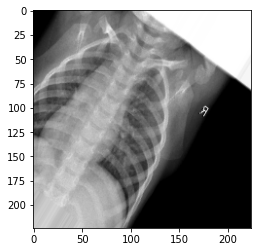

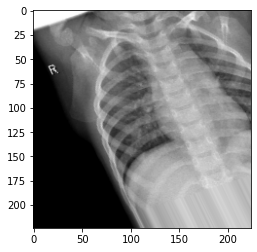

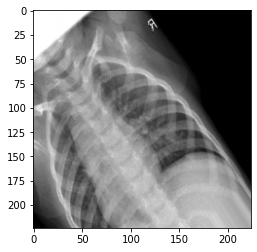

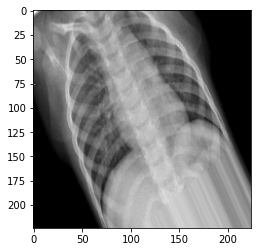

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
import numpy as np
#filenames = os.listdir(t_yeast)
fnames = [os.path.join(t_normal, fname) for
          fname in os.listdir(t_normal)]
img=fnames[2]
#fnames = [os.path.join(train_cats_dir, fname) for
 #         fname in os.listdir(train_cats_dir)]
#img_path = fnames[3]
img = utils.load_img(img, target_size=(224, 224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()  

In [ ]:
filenames = os.listdir(t_normal)

In [ ]:
filenames [1]

'IM-0536-0001.jpeg'

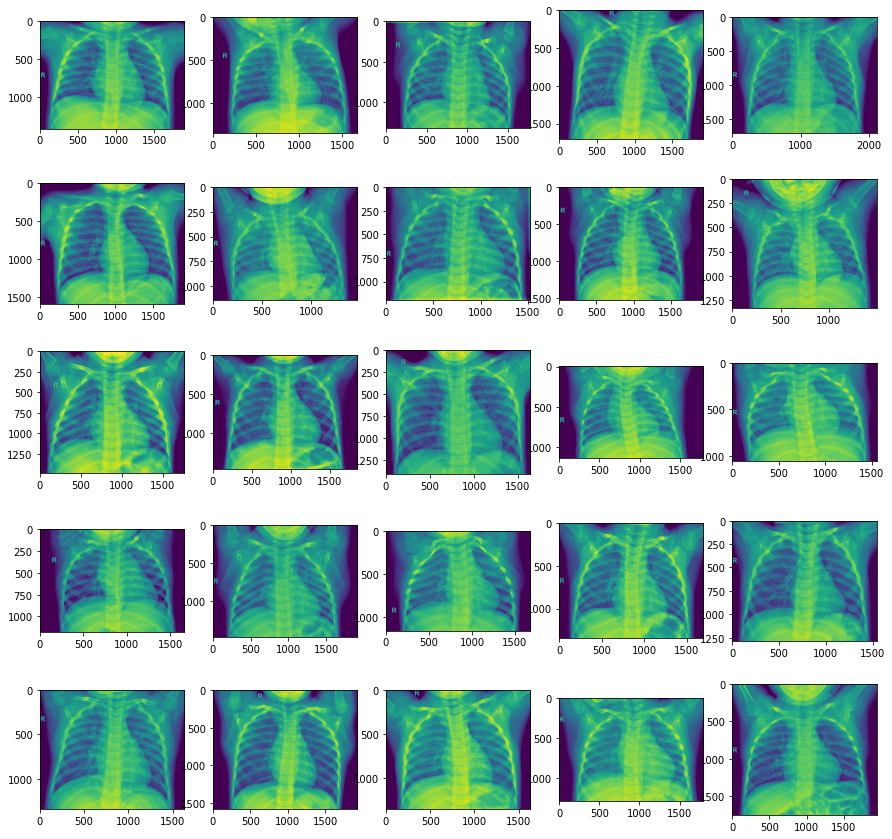

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
plt.figure(figsize=(15,15))
#TAMANO_IMG=100
#fnames = [os.path.join(t_yeast, fname) for
      #    fname in os.listdir(t_yeast)]
#img_path = fnames[3]
#img = utils.load_img(img_path, target_size=(150, 150))

for i, nombreimg in enumerate(filenames[:25]):
  plt.subplot(5,5,i+1)

  imagen = mpimg.imread(t_normal + '/' + nombreimg)

  plt.imshow(imagen)

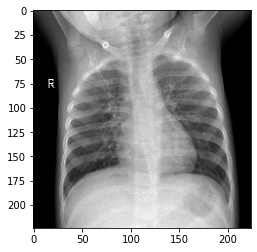

In [ ]:
from tensorflow.keras import utils
img_path = fnames[1]
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = utils.load_img(img_path, target_size=(224, 224))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

_______________________________________________________________________________________________________
______________________________________________________________________________________________________
______________________________________________________________________________________________________

**Red preentrenada MovilNetV2**

extraccion de caracteristicas con aumento de datos

In [6]:
from tensorflow.keras.applications import ResNet50V2
conv_base = ResNet50V2(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

94668760/94668760 [==============================] - 0s 0us/step


In [7]:
x = conv_base.output #(in your case pre_trained model is efficientnet-b3)

flatten = layers.Flatten()(x)

dense1 = layers.Dense(256, activation='relu')(flatten)

pred = layers.Dense(1, activation='sigmoid')(dense1)


model = Model(inputs= conv_base.input, outputs=pred) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [8]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 176


In [9]:
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_images,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator)

Epoch 1/30
163/163 [==============================] - 786s 4s/step - loss: 1.5385 - accuracy: 0.8782 - val_loss: 0.7953 - val_accuracy: 0.8990
Epoch 2/30
163/163 [==============================] - 139s 853ms/step - loss: 0.6009 - accuracy: 0.9137 - val_loss: 1.0176 - val_accuracy: 0.8862
Epoch 3/30
163/163 [==============================] - 137s 839ms/step - loss: 0.4121 - accuracy: 0.9307 - val_loss: 0.8140 - val_accuracy: 0.8670
Epoch 4/30
163/163 [==============================] - 138s 844ms/step - loss: 0.2447 - accuracy: 0.9396 - val_loss: 0.4559 - val_accuracy: 0.8942
Epoch 5/30
163/163 [==============================] - 136s 837ms/step - loss: 0.2295 - accuracy: 0.9384 - val_loss: 0.3195 - val_accuracy: 0.9151
Epoch 6/30
163/163 [==============================] - 137s 842ms/step - loss: 0.2144 - accuracy: 0.9432 - val_loss: 0.3113 - val_accuracy: 0.9135
Epoch 7/30
163/163 [==============================] - 137s 843ms/step - loss: 0.1958 - accuracy: 0.9461 - val_loss: 0.3114 - va

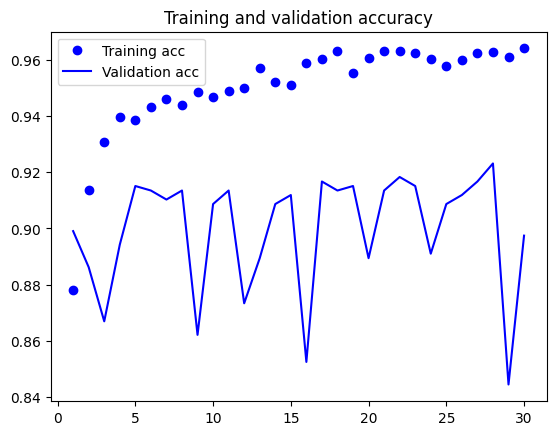

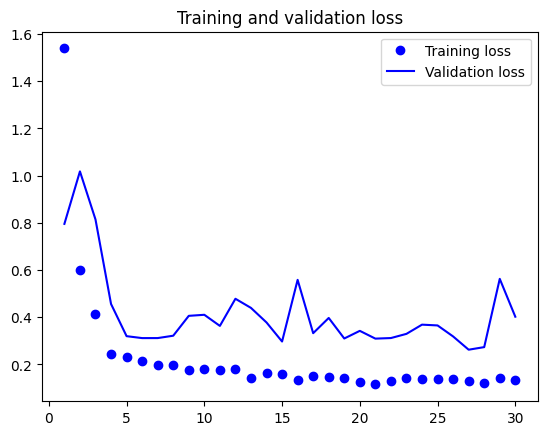

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

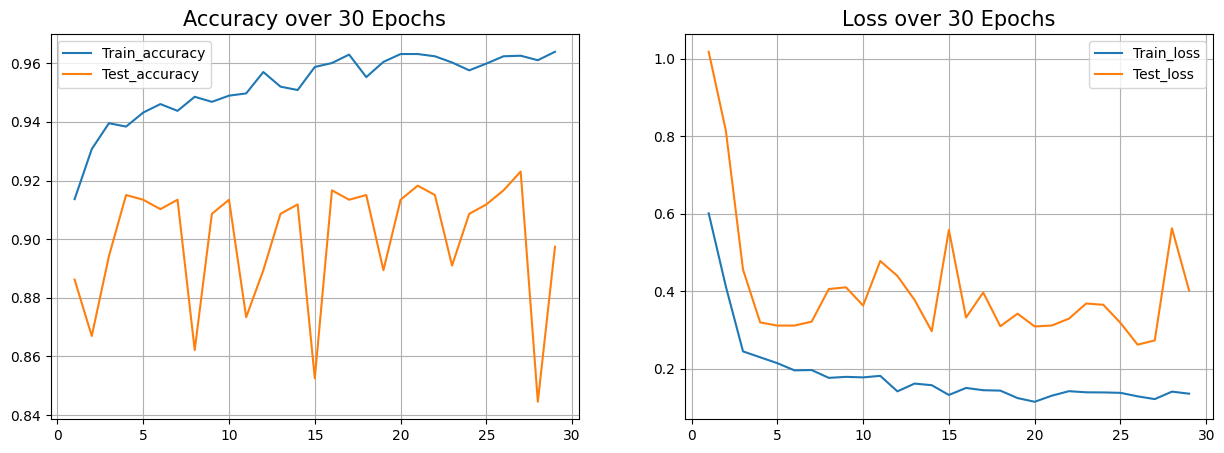

In [14]:
epoch=30
def plot_acc_loss(result, epochs):
 acc = result.history["accuracy"]
 loss = result.history["loss"]
 val_acc = result.history["val_accuracy"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_accuracy")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_accuracy")
 plt.title("Accuracy over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 30)

In [16]:
model.save("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/modelresnet_1.h")
model.save_weights("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/pesosresnet_1.h")

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validation_images,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print("test loss", test_loss)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 9s 438ms/step - loss: 0.4019 - accuracy: 0.8974
test loss 0.401906818151474
test acc: 0.8974359035491943


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
 test_dir_1,
 target_size=(224,224),
 batch_size=32,
 shuffle=False,
 seed=42,
 class_mode="binary")

test_generator.reset()
x = model.evaluate(test_generator,
                             steps = np.ceil(len(test_generator) / 32),
                             use_multiprocessing = False,
                             verbose = 1,
                             workers=1)
print("Test loss:" , x[0])
print("Test accuracy:",x[1])

Found 20 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step - loss: 0.0270 - accuracy: 1.0000
Test loss: 0.027015546336770058
Test accuracy: 1.0


1/1 [==============================] - 3s 3s/step
Predictions finished
NORMAL/IM-0511-0001.jpeg


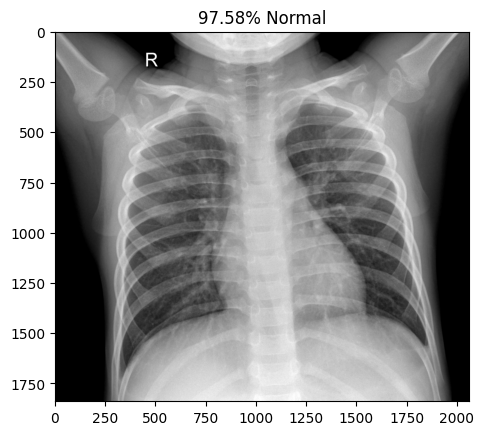

NORMAL/IM-0526-0001.jpeg


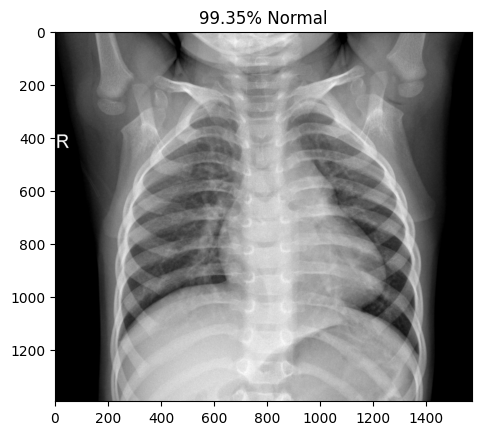

NORMAL/IM-0531-0001.jpeg


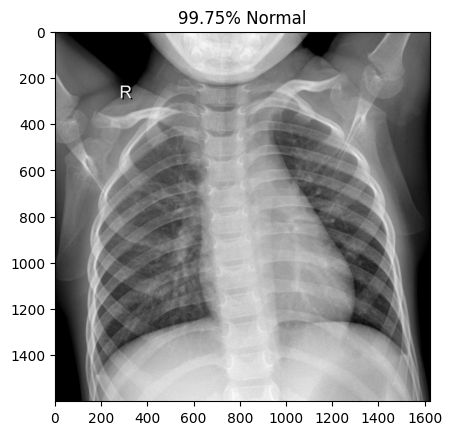

NORMAL/IM-0533-0001.jpeg


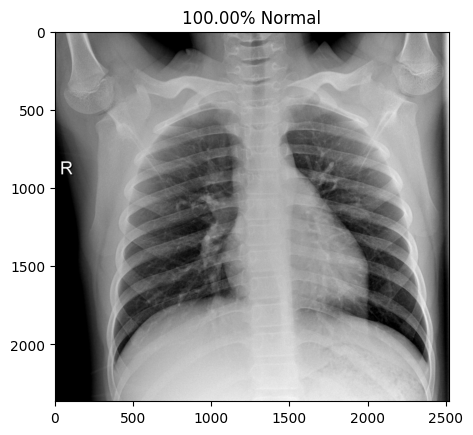

NORMAL/IM-0534-0001.jpeg


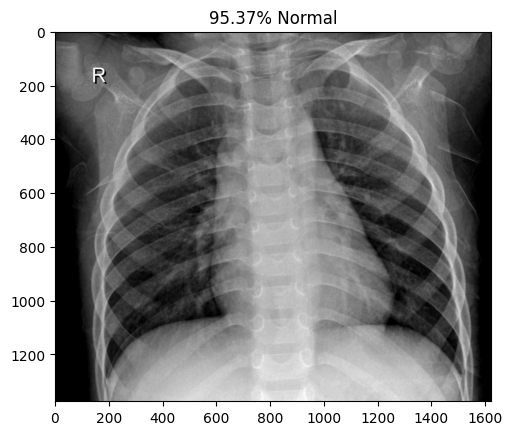

NORMAL/IM-0535-0001.jpeg


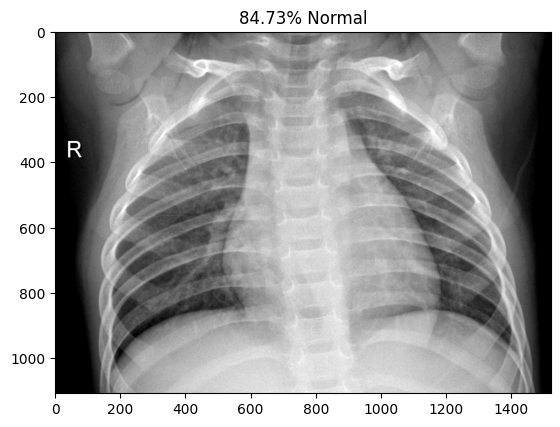

NORMAL/IM-0539-0001.jpeg


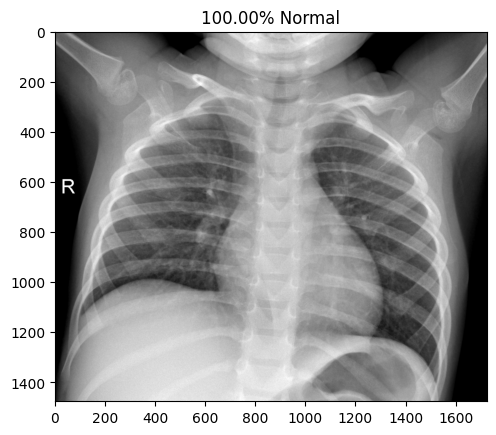

NORMAL/IM-0545-0001-0002.jpeg


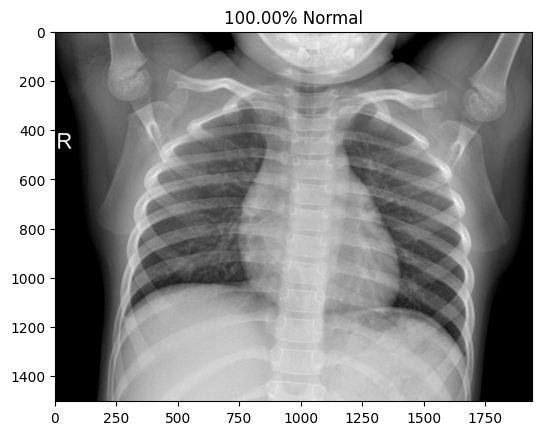

NORMAL/IM-0547-0001.jpeg


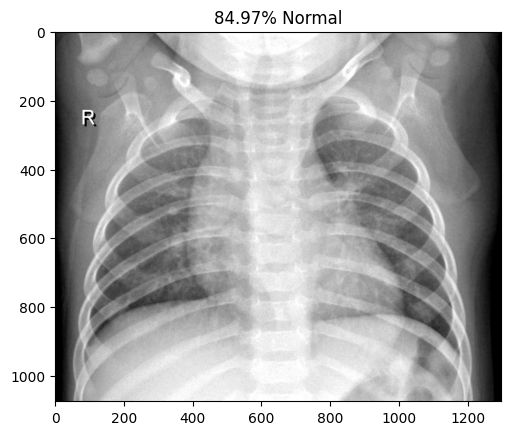

NORMAL/IM-0549-0001.jpeg


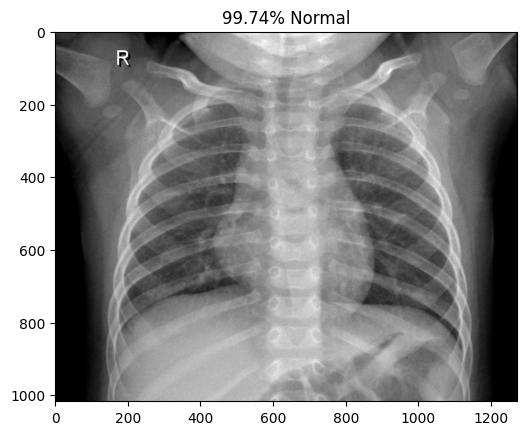

PNEUMONIA/person501_virus_1010.jpeg


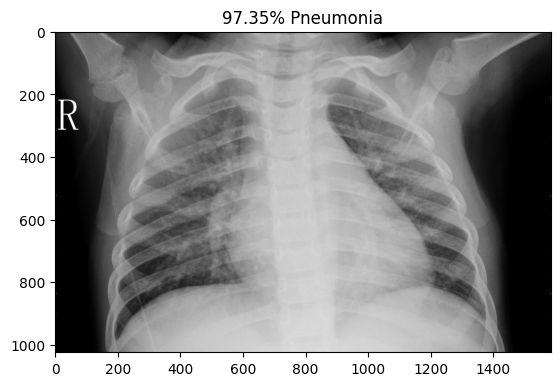

PNEUMONIA/person502_bacteria_2122.jpeg


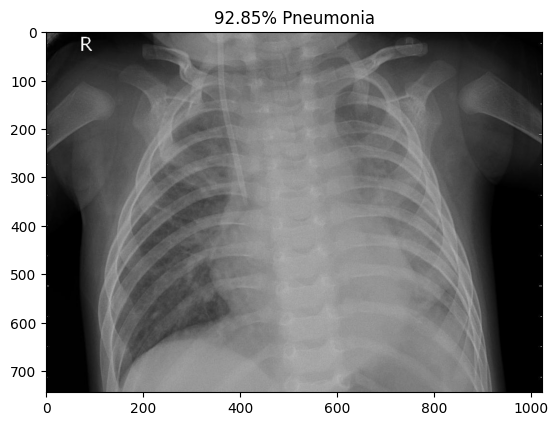

PNEUMONIA/person502_virus_1012.jpeg


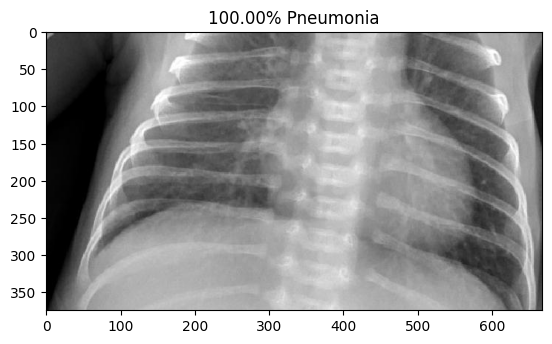

PNEUMONIA/person508_bacteria_2142.jpeg


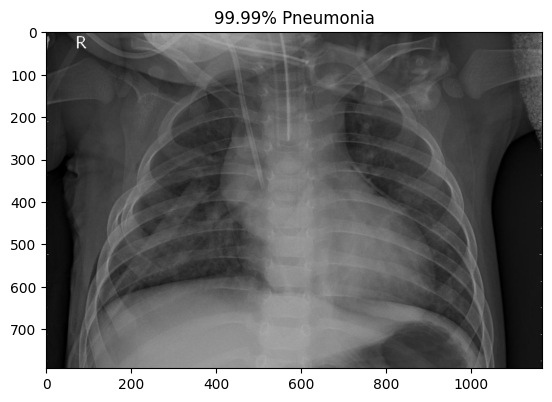

PNEUMONIA/person508_virus_1021.jpeg


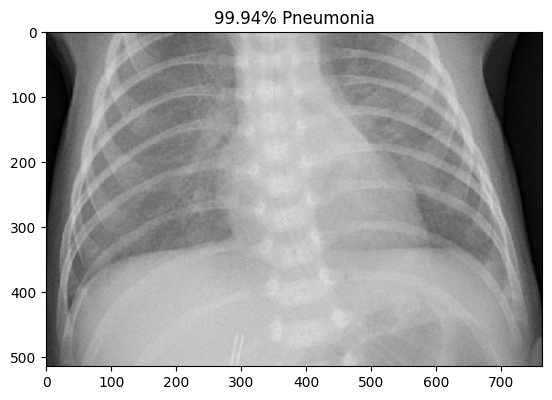

PNEUMONIA/person516_bacteria_2192.jpeg


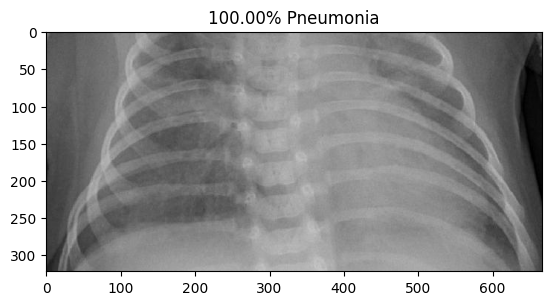

PNEUMONIA/person520_virus_1039.jpeg


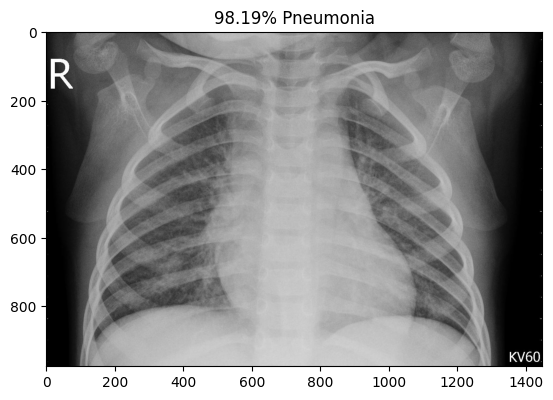

PNEUMONIA/person536_bacteria_2259.jpeg


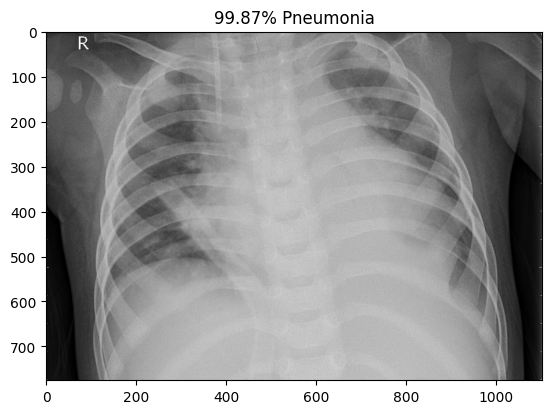

PNEUMONIA/person53_bacteria_253.jpeg


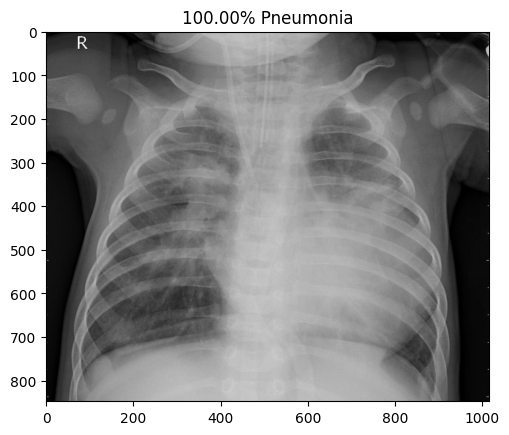

PNEUMONIA/person540_virus_1070.jpeg


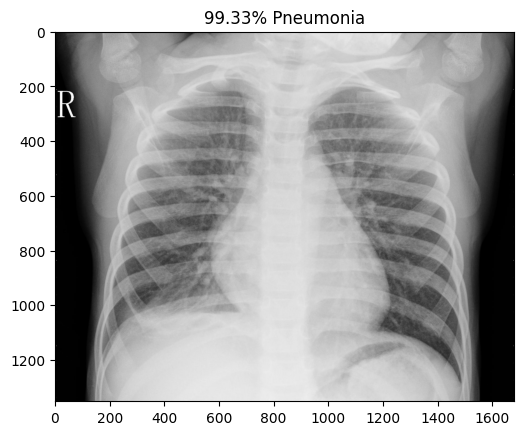

In [18]:
test_generator.reset() 
pred = model.predict(test_generator,1000,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
 image_path = test_dir_1 + "/" +test_generator.filenames[index]
 image = mpimg.imread(image_path)
 #BGR TO RGB conversion using CV2
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 pixels = np.array(image)
 plt.imshow(pixels)
 
 print(test_generator.filenames[index])
 if probability > 0.5:
   plt.title("%.2f" % (probability[0]*100) + "% Pneumonia")
 else:
   plt.title("%.2f" % ((1-probability[0])*100) + "% Normal")
 plt.show()

**Visualización de las convnets**

In [19]:
from tensorflow.keras import utils
img_path = '/content/drive/MyDrive/radiografia/chest_x_ray/test_1/PNEUMONIA/person540_virus_1070.jpeg'
from keras.preprocessing import image
import numpy as np
img = utils.load_img(img_path, target_size=(224, 224))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

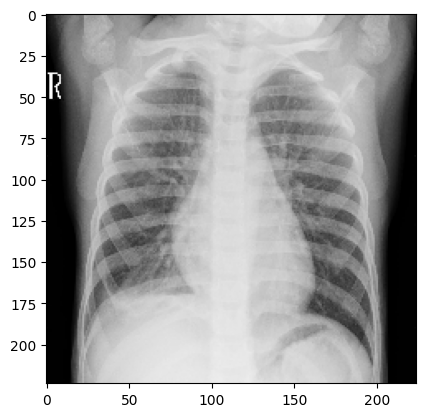

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [21]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [23]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 189ms/step


In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 224, 224, 3)


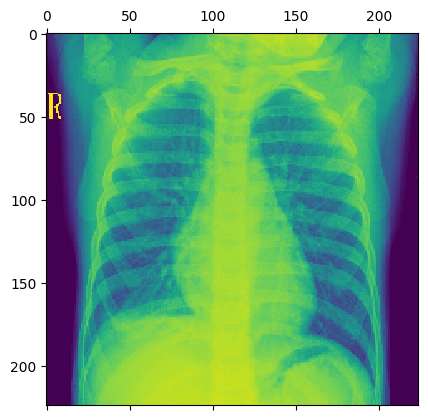

In [25]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

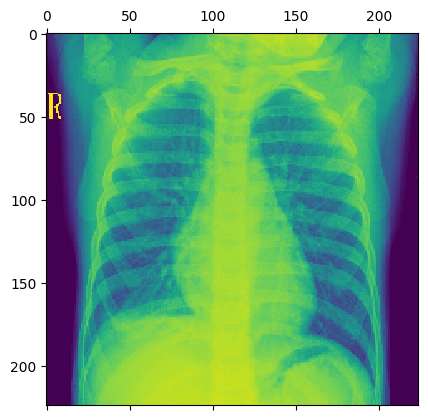

In [26]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

<ipython-input-27-67c32b21b77d>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


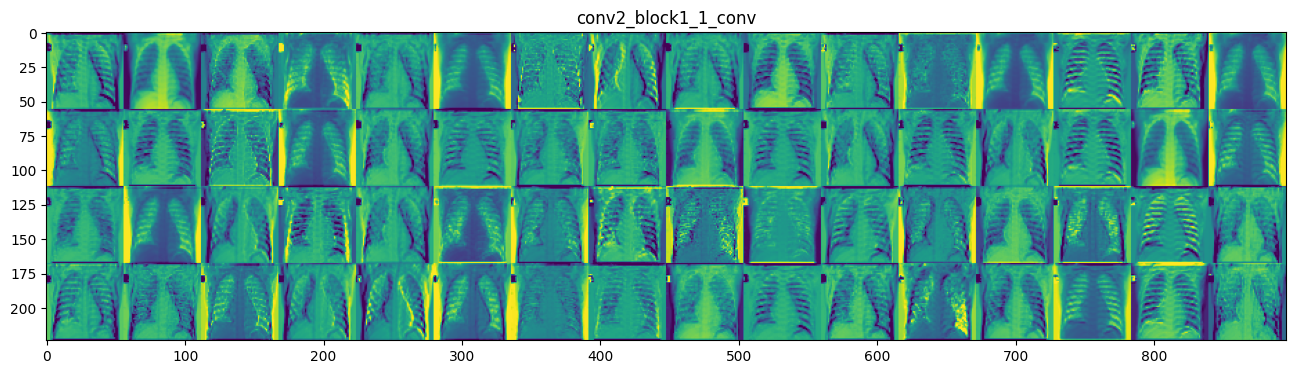

In [27]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
                                       :, :,
                                       col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Mapa de calor**

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/modelvgg16_1.h")

In [28]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

input_1
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2_pre

**NORMAL**

In [29]:
img_NORMAL ='/content/drive/MyDrive/radiografia/chest_x_ray/test_1/NORMAL/IM-0545-0001-0002.jpeg'

In [30]:
last_conv_layer_name = "conv5_block3_out"

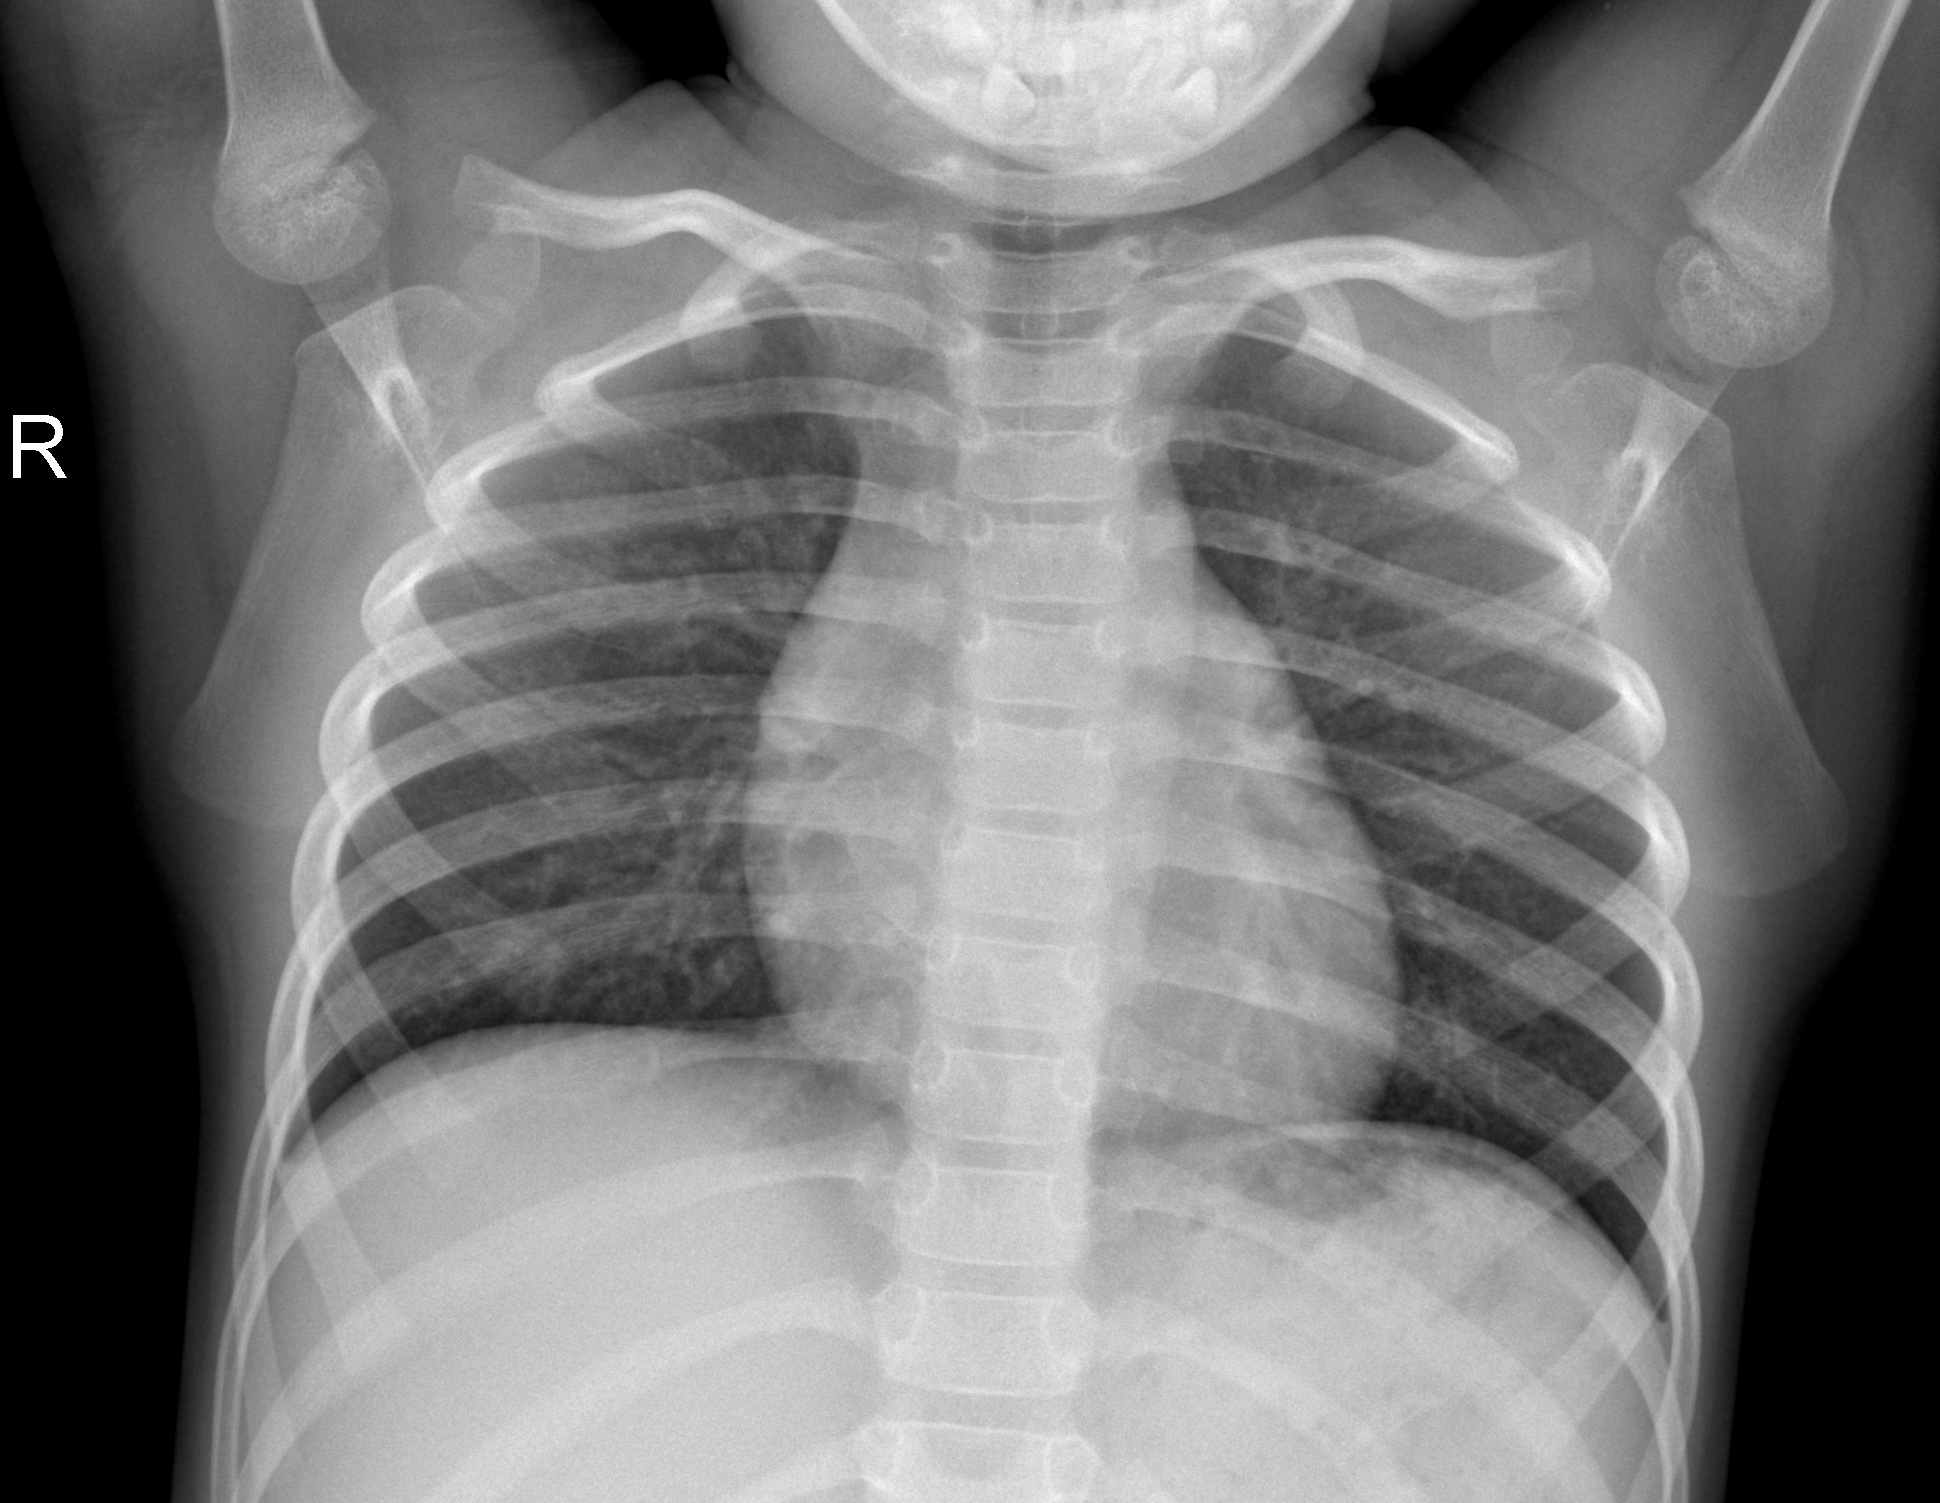

In [31]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
img_size = (224, 224)

# The local path to our target image
img_path = img_NORMAL
display(Image(img_path))

In [32]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

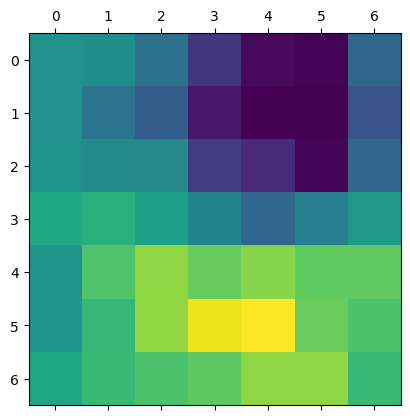

In [33]:
import cv2
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
# Remove last layer's softmax
model.layers[-1].activation = None



# Generate class activation heatmap
heatmap = make_gradcam_heatmap(image, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-34-34e0b9574523>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


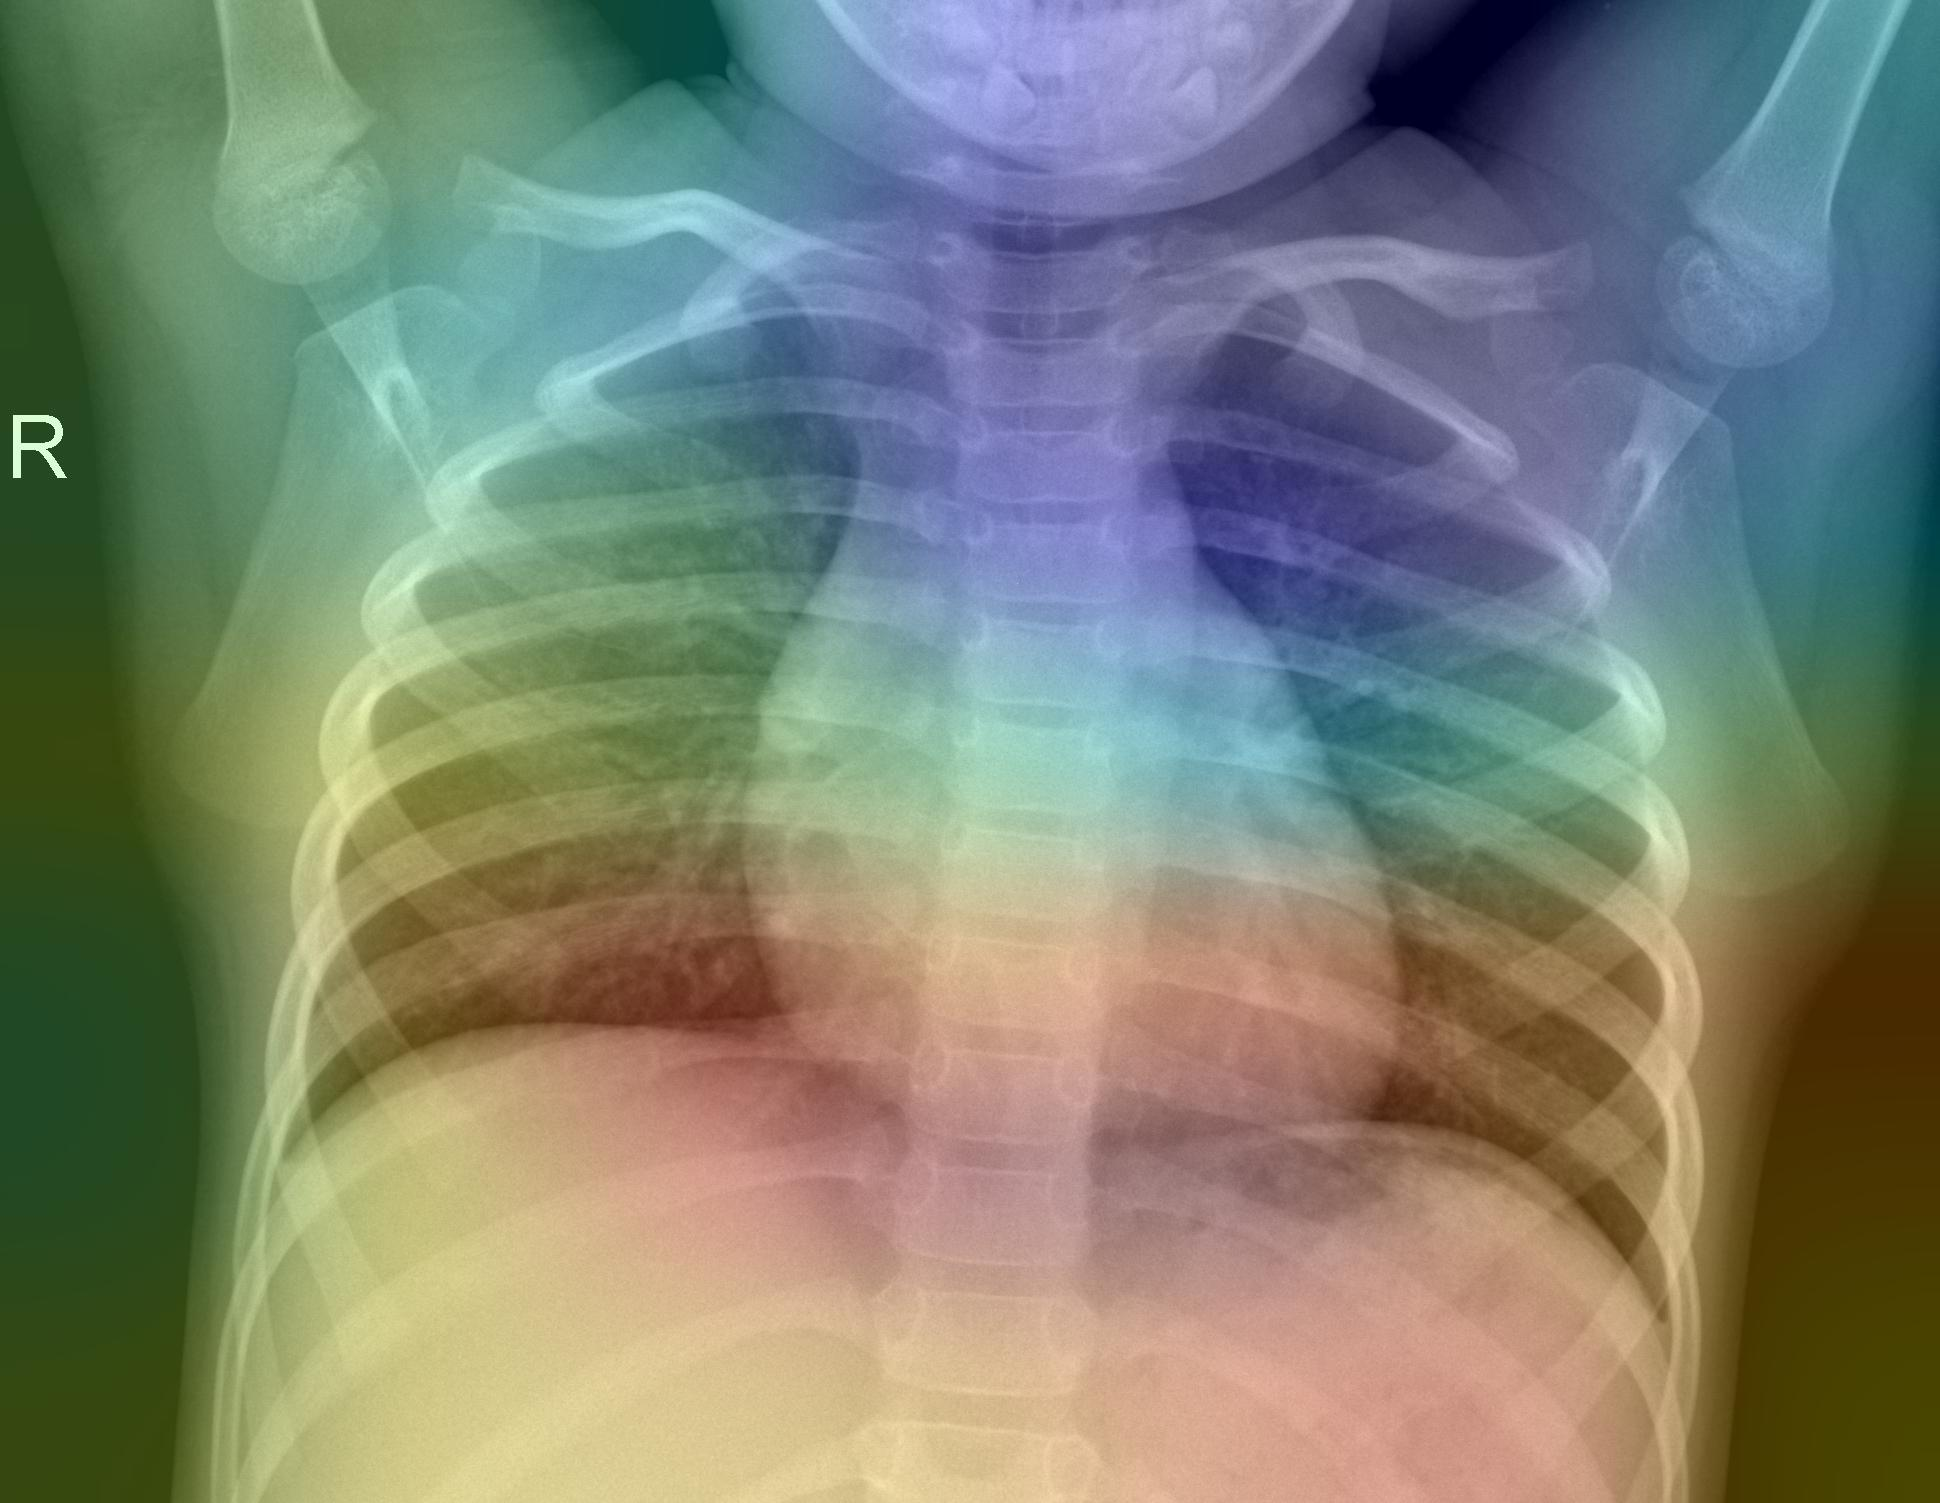

In [34]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

**PNEUMONIA**

In [39]:
img_PNEUMONIA ='/content/drive/MyDrive/radiografia/chest_x_ray/test_1/PNEUMONIA/person516_bacteria_2192.jpeg'

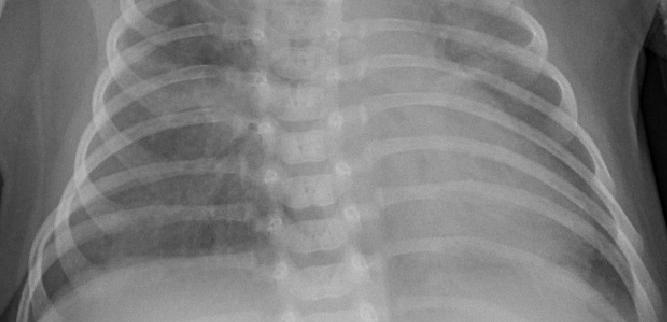

In [40]:
img_size = (224, 224)

# The local path to our target image
img_path = img_PNEUMONIA
display(Image(img_path))

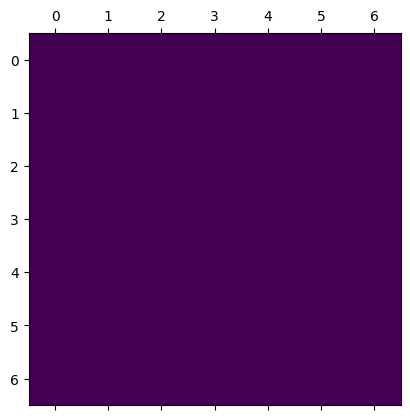

In [41]:
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
# Remove last layer's softmax
model.layers[-1].activation = None



# Generate class activation heatmap
heatmap = make_gradcam_heatmap(image, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-34-34e0b9574523>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


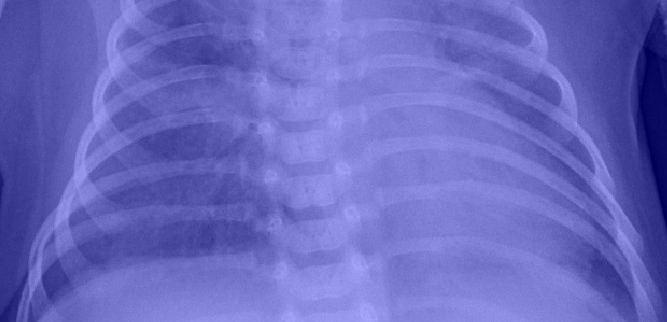

In [42]:
save_and_display_gradcam(img_path, heatmap)

**Grad-CAM Class Activation Visualization**

In [43]:
import cv2
class GradCAM:
    def __init__(self, model, classs, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classs = classs
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [44]:
#PREDICTION NORMAL
img_path = img_NORMAL
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = model.predict(image) 
i = round(preds[0][0])

1/1 [==============================] - 1s 1s/step


In [45]:
icam = GradCAM(model, i, last_conv_layer_name) 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (224, 224))

image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(224, 224) (224, 224, 3)


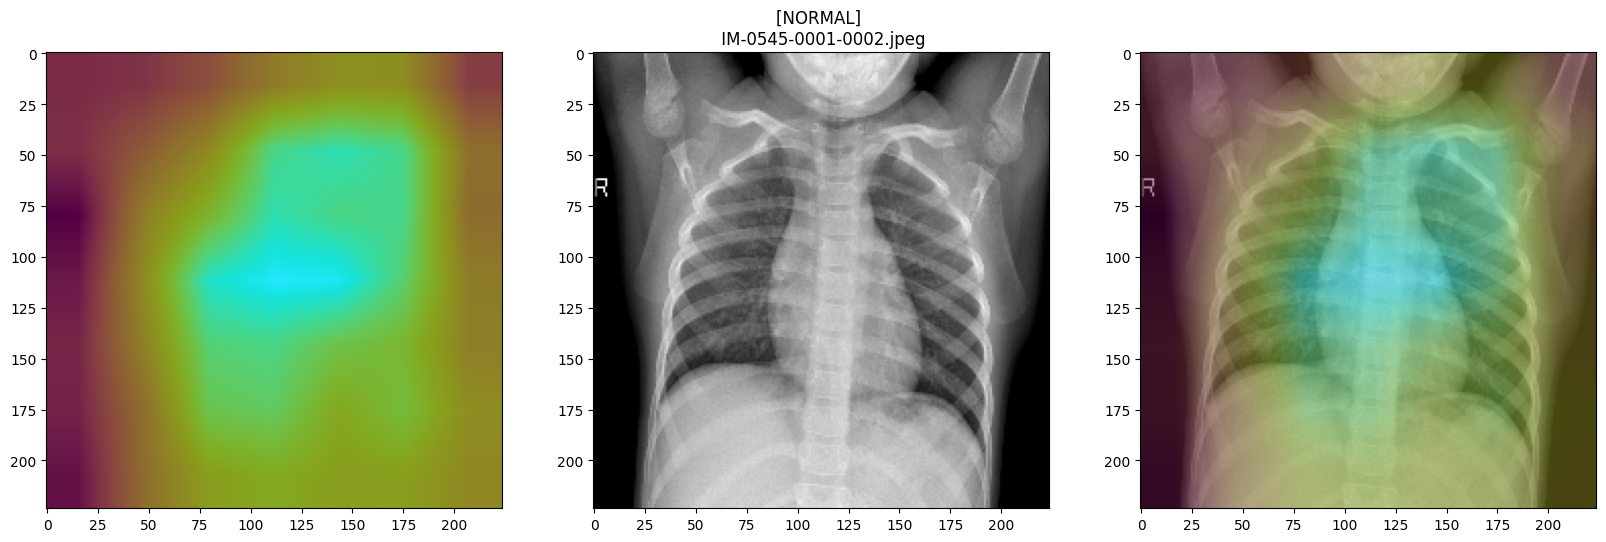

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[1].set_title(f"[{img_path.split('/')[-2]}] \n {img_path.split('/')[-1]}")
ax[2].imshow(output)
plt.savefig('gradcam1.png', bbox_inches='tight', dpi=300);

In [47]:
# PREDICTION PNEUMONIA
img_path = img_PNEUMONIA
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = model.predict(image) 
i = round(preds[0][0])

1/1 [==============================] - 0s 28ms/step


In [48]:
icam = GradCAM(model, i, last_conv_layer_name) 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (224, 224))

image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(224, 224) (224, 224, 3)


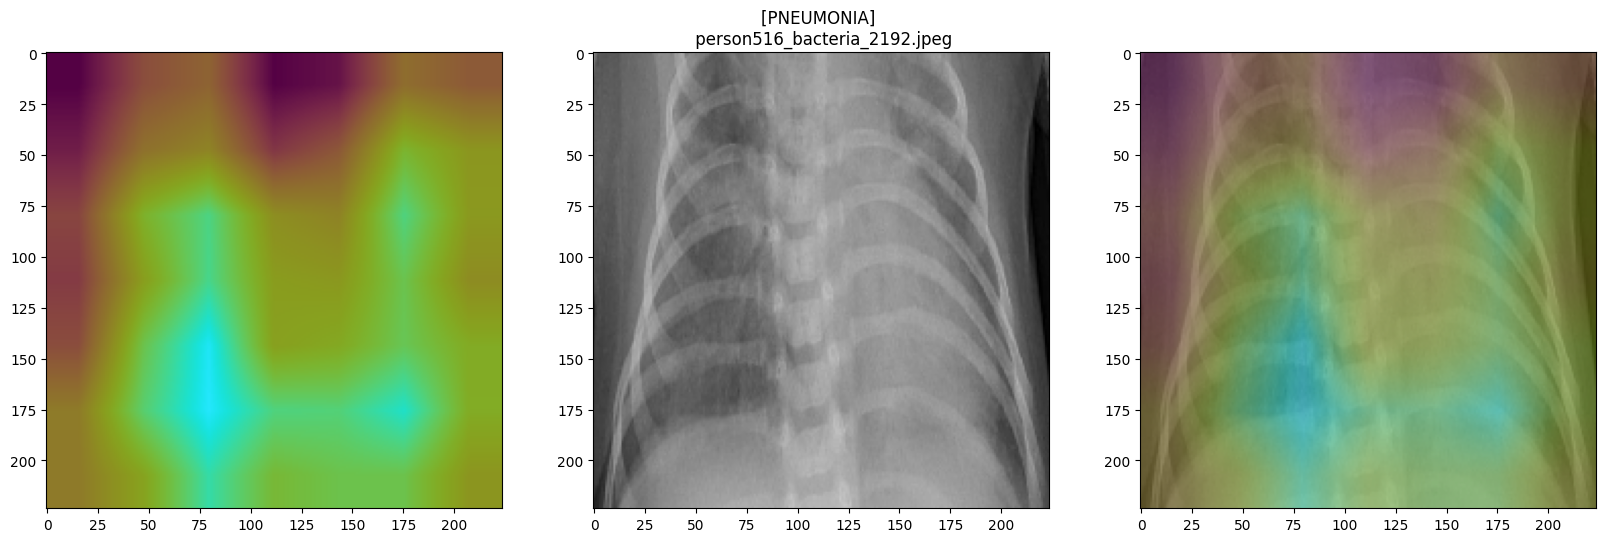

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[1].set_title(f"[{img_path.split('/')[-2]}] \n {img_path.split('/')[-1]}")
ax[2].imshow(output)
plt.savefig('gradcam1.png', bbox_inches='tight', dpi=300);

____________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________